In [11]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [12]:
# define source
credit_risk_path = "Resources/lending_data.csv"
# import the data
credit_risk_data = pd.read_csv(credit_risk_path)
# display preview
credit_risk_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [13]:
# Assign the data to X and y
X = credit_risk_data[['loan_size','interest_rate','borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks','total_debt']]
y = credit_risk_data['loan_status']
print("Shape: ", X.shape, y.shape)

Shape:  (77536, 7) (77536,)


In [14]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
29175,8600.0,6.792,44500,0.325843,3,0,14500
23020,7800.0,6.419,41000,0.268293,2,0,11000
31269,10000.0,7.386,50100,0.401198,4,1,20100
35479,9300.0,7.093,47300,0.365751,3,0,17300
13470,9200.0,7.045,46900,0.360341,3,0,16900


In [29]:
X_test.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
60914,12600.0,8.469,60300,0.502488,6,1,30300
36843,9800.0,7.289,49200,0.390244,4,0,19200
1966,10900.0,7.770,53700,0.441341,5,1,23700
70137,10700.0,7.666,52700,0.430740,5,1,22700
27237,9900.0,7.353,49800,0.397590,4,0,19800


Prediction: I predict that the logistical regression will perform better. Based on the material we covered in class, this type of model will perform well even if the test data and train data differ significantly and often a simpler model is 'good enough' and should be used when applicable.

## Logistic Regression

In [30]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier

LogisticRegression()

In [31]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [32]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [33]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [34]:
# Train a Logistic Regression model print the model score 0.9908171687990095
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [41]:
# create confusion matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]])

In [42]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


## Random Forest Classifier

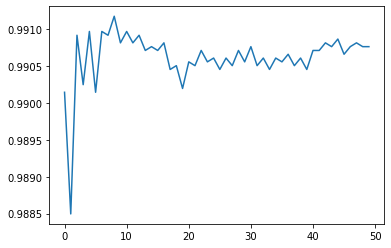

score: 0.9907655798596781


In [35]:
#manual construction of random forest classifier
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [40]:
# Train a Random Forest Classifier model and print the model score 0.9910751134956666
clf = RandomForestClassifier(random_state=None, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.997506534598982
Testing Score: 0.9915394139496492


In [46]:
clf = RandomForestClassifier(random_state=None, n_estimators=20).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9973345714678773
Testing Score: 0.9917973586463062
